In [1]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

In [ ]:
share_num = 200,000
max_car = -0.01 * share_num

In [3]:
# Use monte carlo to simulate the expected utility of always buy without hiring the expert

price_0 = np.random.normal(0.0025, 0.00327, 100000)
price_1 = np.random.normal(price_0, 0.00327, 100000)
price_2 = np.random.normal(price_1, 0.00327, 100000)
price_3 = np.random.normal(price_2, 0.00327, 100000)

# Convert log returns to actual price ratios and calculate profit
price_ratios = np.exp(price_1) * np.exp(price_2) * np.exp(price_3)
profit = price_ratios - 1  # (final_price/initial_price - 1)
profit = profit * share_num  # Scale up to the number of shares

# Calculate CVaR (cvar) as the mean of the worst 5% of outcomes
percentile_5 = np.percentile(profit, 5)
tail_values = profit[profit <= percentile_5]
cvar = np.mean(tail_values)  # This is CVaR

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 4.000e+00, 4.000e+00, 7.000e+00, 5.000e+00, 1.000e+00,
        8.000e+00, 1.300e+01, 1.400e+01, 2.500e+01, 2.000e+01, 2.800e+01,
        4.100e+01, 4.800e+01, 7.900e+01, 9.400e+01, 1.000e+02, 1.620e+02,
        1.770e+02, 2.280e+02, 2.610e+02, 3.380e+02, 3.750e+02, 4.950e+02,
        5.360e+02, 6.760e+02, 7.750e+02, 9.350e+02, 1.104e+03, 1.197e+03,
        1.394e+03, 1.473e+03, 1.644e+03, 1.887e+03, 2.066e+03, 2.227e+03,
        2.318e+03, 2.525e+03, 2.711e+03, 2.903e+03, 2.908e+03, 3.120e+03,
        3.162e+03, 3.214e+03, 3.368e+03, 3.338e+03, 3.434e+03, 3.319e+03,
        3.270e+03, 3.214e+03, 3.138e+03, 3.053e+03, 3.004e+03, 2.869e+03,
        2.696e+03, 2.573e+03, 2.357e+03, 2.277e+03, 2.026e+03, 1.925e+03,
        1.615e+03, 1.514e+03, 1.288e+03, 1.213e+03, 1.041e+03, 9.280e+02,
        8.260e+02, 7.340e+02, 6.400e+02, 5.190e+02, 4.090e+02, 4.450e+02,
        2.910e+02, 2.610e+02, 2.250e+0

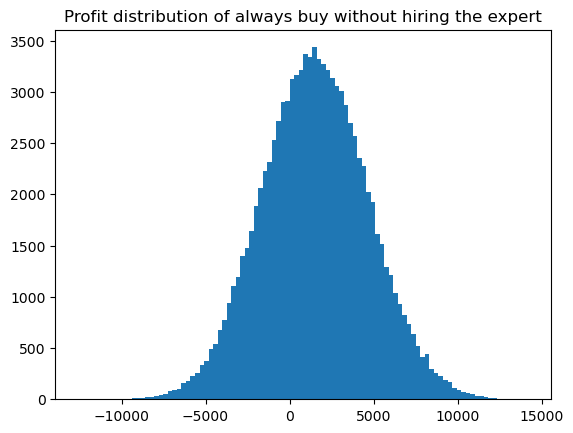

In [4]:
# plot the profit distribution
plt.title('Profit distribution of always buy without hiring the expert')
plt.hist(profit, bins=100)

In [5]:
# calculate the expected utility without risk
profit.mean()

1529.5776890128427

In [6]:
# calculate the expected utility with risk
print('cvar is', cvar)
print('Maximum allowable cvar is', max_car)
if cvar < max_car:
    print('Risk is too high, the expected utility is 0')
else:
    expected_utility = profit.mean() 
    print(expected_utility)

cvar is -4884.009820521538
Maximum allowable cvar is -2000.0
Risk is too high, the expected utility is 0


In [7]:
# Conclusion: always buy is too risky, the expected utility is 0

In [8]:
# Use monte carlo to simulate the expected utility of buy with expert

price_0 = np.random.normal(0.0025, 0.00327, 100000)
price_1 = np.random.normal(price_0, 0.00327, 100000)
price_2 = np.random.normal(price_1, 0.00327, 100000)
price_3 = np.random.normal(price_2, 0.00327, 100000)

price_estimate = np.random.normal(price_2, 0.00327 / 4, 100000)

price_ratios = np.exp(price_1) * np.exp(price_2) * np.exp(price_3)
potential_profit = price_ratios - 1  # (final_price/initial_price - 1)
potential_profit = potential_profit * share_num  # Scale up to the number of shares

profit = np.where(price_estimate > 0.0028, potential_profit, 0)

# the actual investment profit is the array of actually realized investment profits
# so everytime price estimate is too much and we decidee not to go with the investment
# the return should be ignored
# so only accounting for the times when we actually invest
# Create mask of where we actually invest based on price estimate
investment_mask = price_estimate > 0.0028

# Only include profits where we actually invested
actual_investment_profit = potential_profit[investment_mask]

actual_profit = profit - 1000  # Cost of hiring the expert


# Calculate CVaR (cvar) as the mean of the worst 5% of outcomes from the actual profit
percentile_5 = np.percentile(actual_profit, 5)
tail_values = actual_profit[actual_profit <= percentile_5]
cvar = np.mean(tail_values)  



(array([1.0000e+00, 2.0000e+00, 3.0000e+00, 5.0000e+00, 1.2000e+01,
        1.5000e+01, 3.5000e+01, 4.2000e+01, 7.0000e+01, 5.2208e+04,
        1.3600e+02, 2.3400e+02, 2.9900e+02, 4.0700e+02, 5.0000e+02,
        6.5400e+02, 7.8300e+02, 9.5100e+02, 1.0660e+03, 1.2110e+03,
        1.3160e+03, 1.5290e+03, 1.5640e+03, 1.6570e+03, 1.7300e+03,
        1.8180e+03, 1.7600e+03, 1.7630e+03, 1.8150e+03, 1.6900e+03,
        1.7040e+03, 1.7190e+03, 1.4460e+03, 1.4590e+03, 1.4100e+03,
        1.2880e+03, 1.3080e+03, 1.2330e+03, 1.1450e+03, 1.1080e+03,
        1.0170e+03, 9.5900e+02, 8.2500e+02, 7.8600e+02, 6.8700e+02,
        6.6400e+02, 6.1700e+02, 5.6100e+02, 5.5500e+02, 4.3400e+02,
        4.1500e+02, 3.8000e+02, 3.7000e+02, 3.1100e+02, 2.8100e+02,
        2.5600e+02, 2.2400e+02, 2.1800e+02, 1.7400e+02, 1.6200e+02,
        1.4800e+02, 1.1400e+02, 1.2100e+02, 7.9000e+01, 7.9000e+01,
        6.9000e+01, 5.5000e+01, 4.6000e+01, 4.4000e+01, 4.0000e+01,
        3.1000e+01, 3.7000e+01, 2.5000e+01, 1.30

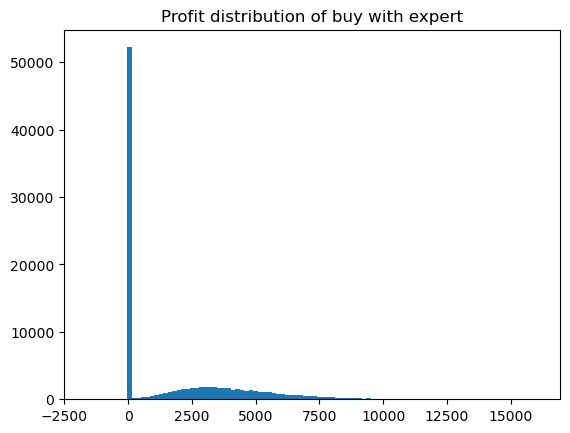

In [9]:
# plot the profit distribution
plt.title('Profit distribution of buy with expert')
plt.hist(profit, bins=100)

(array([1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        6.000e+00, 4.000e+00, 6.000e+00, 8.000e+00, 1.200e+01, 2.300e+01,
        1.800e+01, 2.500e+01, 3.600e+01, 5.200e+01, 6.200e+01, 8.400e+01,
        1.130e+02, 1.340e+02, 1.820e+02, 2.070e+02, 2.730e+02, 3.230e+02,
        4.100e+02, 4.870e+02, 5.600e+02, 6.820e+02, 7.880e+02, 9.330e+02,
        1.051e+03, 1.254e+03, 1.369e+03, 1.569e+03, 1.791e+03, 1.999e+03,
        2.106e+03, 2.381e+03, 2.499e+03, 2.722e+03, 2.881e+03, 2.966e+03,
        3.254e+03, 3.227e+03, 3.380e+03, 3.529e+03, 3.452e+03, 3.525e+03,
        3.558e+03, 3.392e+03, 3.411e+03, 3.279e+03, 3.238e+03, 3.062e+03,
        2.967e+03, 2.757e+03, 2.765e+03, 2.285e+03, 2.195e+03, 2.102e+03,
        1.908e+03, 1.778e+03, 1.549e+03, 1.383e+03, 1.170e+03, 1.050e+03,
        9.060e+02, 8.210e+02, 6.700e+02, 6.040e+02, 4.990e+02, 4.160e+02,
        3.720e+02, 2.970e+02, 2.580e+02, 1.840e+02, 1.670e+02, 1.200e+02,
        9.600e+01, 7.600e+01, 6.300e+0

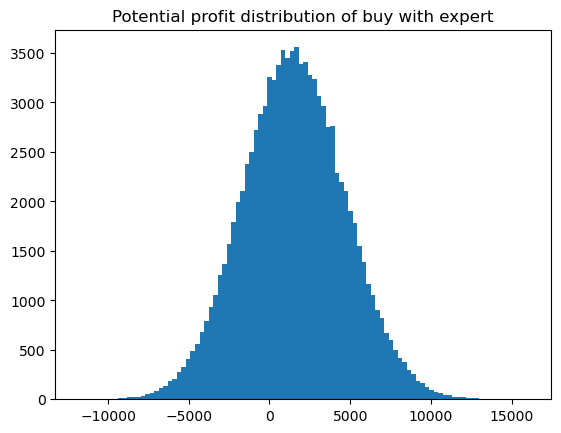

In [10]:
# plot the potential profit distribution
plt.title('Potential profit distribution of buy with expert')
plt.hist(potential_profit, bins=100)

(array([1.000e+00, 2.000e+00, 3.000e+00, 5.000e+00, 1.200e+01, 1.500e+01,
        3.500e+01, 4.200e+01, 7.000e+01, 1.050e+02, 1.360e+02, 2.340e+02,
        2.990e+02, 4.070e+02, 5.000e+02, 6.540e+02, 7.830e+02, 9.510e+02,
        1.066e+03, 1.211e+03, 1.316e+03, 1.529e+03, 1.564e+03, 1.657e+03,
        1.730e+03, 1.818e+03, 1.760e+03, 1.763e+03, 1.815e+03, 1.690e+03,
        1.704e+03, 1.719e+03, 1.446e+03, 1.459e+03, 1.410e+03, 1.288e+03,
        1.308e+03, 1.233e+03, 1.145e+03, 1.108e+03, 1.017e+03, 9.590e+02,
        8.250e+02, 7.860e+02, 6.870e+02, 6.640e+02, 6.170e+02, 5.610e+02,
        5.550e+02, 4.340e+02, 4.150e+02, 3.800e+02, 3.700e+02, 3.110e+02,
        2.810e+02, 2.560e+02, 2.240e+02, 2.180e+02, 1.740e+02, 1.620e+02,
        1.480e+02, 1.140e+02, 1.210e+02, 7.900e+01, 7.900e+01, 6.900e+01,
        5.500e+01, 4.600e+01, 4.400e+01, 4.000e+01, 3.100e+01, 3.700e+01,
        2.500e+01, 1.300e+01, 1.500e+01, 1.500e+01, 1.500e+01, 1.500e+01,
        8.000e+00, 9.000e+00, 8.000e+0

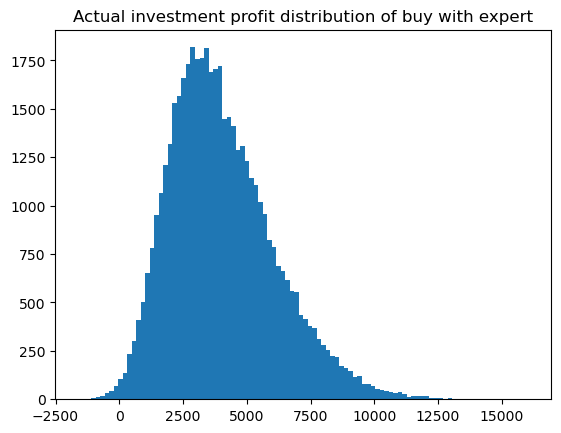

In [11]:
# plot the distributions actual_investment_profit
plt.title('Actual investment profit distribution of buy with expert')
plt.hist(actual_investment_profit, bins=100)

(array([1.0000e+00, 2.0000e+00, 3.0000e+00, 5.0000e+00, 1.2000e+01,
        1.5000e+01, 3.5000e+01, 4.2000e+01, 7.0000e+01, 5.2208e+04,
        1.3600e+02, 2.3400e+02, 2.9900e+02, 4.0700e+02, 5.0000e+02,
        6.5400e+02, 7.8300e+02, 9.5100e+02, 1.0660e+03, 1.2110e+03,
        1.3160e+03, 1.5290e+03, 1.5640e+03, 1.6570e+03, 1.7300e+03,
        1.8180e+03, 1.7600e+03, 1.7630e+03, 1.8150e+03, 1.6900e+03,
        1.7040e+03, 1.7190e+03, 1.4460e+03, 1.4590e+03, 1.4100e+03,
        1.2880e+03, 1.3080e+03, 1.2330e+03, 1.1450e+03, 1.1080e+03,
        1.0170e+03, 9.5900e+02, 8.2500e+02, 7.8600e+02, 6.8700e+02,
        6.6400e+02, 6.1700e+02, 5.6100e+02, 5.5500e+02, 4.3400e+02,
        4.1500e+02, 3.8000e+02, 3.7000e+02, 3.1100e+02, 2.8100e+02,
        2.5600e+02, 2.2400e+02, 2.1800e+02, 1.7400e+02, 1.6200e+02,
        1.4800e+02, 1.1400e+02, 1.2100e+02, 7.9000e+01, 7.9000e+01,
        6.9000e+01, 5.5000e+01, 4.6000e+01, 4.4000e+01, 4.0000e+01,
        3.1000e+01, 3.7000e+01, 2.5000e+01, 1.30

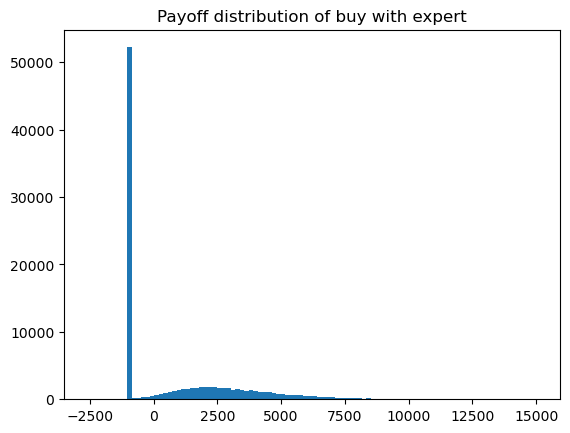

In [12]:
# plot the actual profit distribution
plt.title('Payoff distribution of buy with expert')
plt.hist(actual_profit, bins=100)

In [13]:
# calculate the expected utility without risk
actual_profit.mean()

936.4696607414922

In [14]:
# calculate the expected utility with risk
print('cvar is', cvar)
print('Maximum allowable cvar is', max_car)
if cvar < max_car:
    print('Risk is too high, the expected utility is 0')
else:
    expected_utility = actual_profit.mean() 
    print(expected_utility)


cvar is -1001.3364755697883
Maximum allowable cvar is -2000.0
936.4696607414922


In [15]:
# Use monte carlo to simulate the expected utility of buy with expert

buy_threshold = -0.05
result = []
counter = 0
while True:
    price_0 = np.random.normal(0.0025, 0.00327, 100000)
    price_1 = np.random.normal(price_0, 0.00327, 100000)
    price_2 = np.random.normal(price_1, 0.00327, 100000)
    price_3 = np.random.normal(price_2, 0.00327, 100000)
    price_estimate = np.random.normal(price_2, 0.00327 / 4, 100000)
    price_ratios = np.exp(price_1) * np.exp(price_2) * np.exp(price_3)
    potential_profit = price_ratios - 1  # (final_price/initial_price - 1)
    potential_profit = potential_profit * share_num  # Scale up to the number of shares
    profit = np.where(price_estimate > buy_threshold, potential_profit, 0)
    # the actual investment profit is the array of actually realized investment profits
    # so everytime price estimate is too much and we decidee not to go with the investment
    # the return should be ignored
    # so only accounting for the times when we actually invest
    # Create mask of where we actually invest based on price estimate
    investment_mask = price_estimate > buy_threshold
    # Only include profits where we actually invested
    # Only include profits where we actually invested
    actual_investment_profit = potential_profit[investment_mask]
    
    actual_profit = profit - 1000  # Cost of hiring the expert

    # Calculate CVaR (cvar) as the mean of the worst 5% of outcomes from the actual profit
    percentile_5 = np.percentile(actual_profit, 5)
    tail_values = actual_profit[actual_profit <= percentile_5]
    cvar = np.mean(tail_values)  # This is CVaR
    

    if cvar < max_car:
        expected_utility = 0
    else:
        expected_utility = actual_profit.mean()

    print('buy_threshold is', buy_threshold)
    print('cvar is', cvar)
    print('Maximum allowable cvar is', max_car)
    print('expected utility is', expected_utility)

    buy_threshold += 0.0001

    if buy_threshold > 0.023:
        break


buy_threshold is -0.05
cvar is -5882.34298113096
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.0499
cvar is -5906.028855817579
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.0498
cvar is -5919.683144408849
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.049699999999999994
cvar is -5919.201258415296
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.04959999999999999
cvar is -5885.973337541243
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.04949999999999999
cvar is -5898.99538880288
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.049399999999999986
cvar is -5875.27047196698
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.04929999999999998
cvar is -5917.229249131845
Maximum allowable cvar is -2000.0
expected utility is 0
buy_threshold is -0.04919999999999998
cvar is -5880.267076198518
Maximum a

In [16]:
# Use monte carlo to simulate the expected utility of buy with expert
buy_threshold = -0.02
result = []
counter = 0
while True:
    for i in range(10):
        price_0 = np.random.normal(0.0025, 0.00327, 100000)
        price_1 = np.random.normal(price_0, 0.00327, 100000)
        price_2 = np.random.normal(price_1, 0.00327, 100000)
        price_3 = np.random.normal(price_2, 0.00327, 100000)

        price_estimate = np.random.normal(price_2, 0.00327 / 4, 100000)

        price_ratios = np.exp(price_1) * np.exp(price_2) * np.exp(price_3)
        potential_profit = price_ratios - 1  # (final_price/initial_price - 1)
        potential_profit = potential_profit * share_num  # Scale up to the number of shares

        profit = np.where(price_estimate > buy_threshold, potential_profit, 0)

        # the actual investment profit is the array of actually realized investment profits
        # so everytime price estimate is too much and we decidee not to go with the investment
        # the return should be ignored
        # so only accounting for the times when we actually invest
        # Create mask of where we actually invest based on price estimate
        investment_mask = price_estimate > buy_threshold

        # Only include profits where we actually invested
        actual_investment_profit = potential_profit[investment_mask]

        actual_profit = profit - 1000  # Cost of hiring the expert

        # Calculate CVaR (cvar) as the mean of the worst 5% of outcomes of the actual profit
        percentile_5 = np.percentile(actual_profit, 5)
        tail_values = actual_profit[actual_profit <= percentile_5]
        cvar = np.mean(tail_values)

        # Calcualte CVaR (cvar) as the mean of the worst 5% of outcomes from the actual_investment_profit
        percentile_5 = np.percentile(actual_investment_profit, 5)
        tail_values = actual_investment_profit[actual_investment_profit <= percentile_5]
        cvar_actual = np.mean(tail_values)

        

        # calculate the expected utility with risk
        if cvar < max_car:
            expected_utility = -1000
        else:
            expected_utility = actual_profit.mean()

        result.append([buy_threshold, expected_utility, cvar, actual_investment_profit.mean(), cvar_actual])

    counter += 1
    buy_threshold += 0.0001

    if buy_threshold > 0.023:
        break


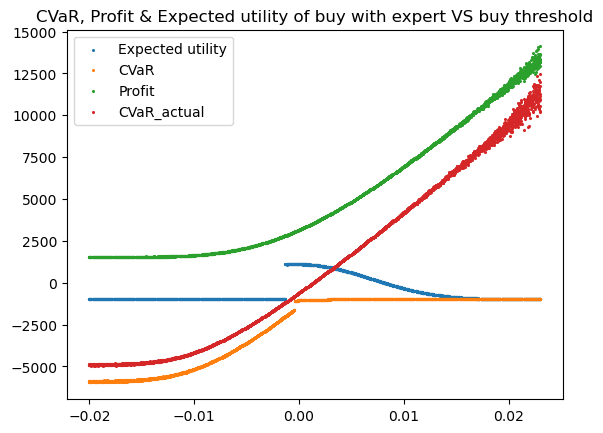

In [17]:
result = np.array(result)

plt.title('CVaR, Profit & Expected utility of buy with expert VS buy threshold')

# plot it as a scatter plot, make the dots smaller
plt.scatter(result[:, 0], result[:, 1], s=1.5)

# plot the cvar as a scatter plot
plt.scatter(result[:, 0], result[:, 2], s=1.5)

# plot the potential profit as a scatter plot
plt.scatter(result[:, 0], result[:, 3], s=1.5)

# plot the cvar_actual as a scatter plot
plt.scatter(result[:, 0], result[:, 4], s=1.5)

# take the average of y values for each x value
unique_xs = np.unique(result[:, 0])


# add legend
plt.legend(['Expected utility', 'CVaR', 'Profit', 'CVaR_actual'])





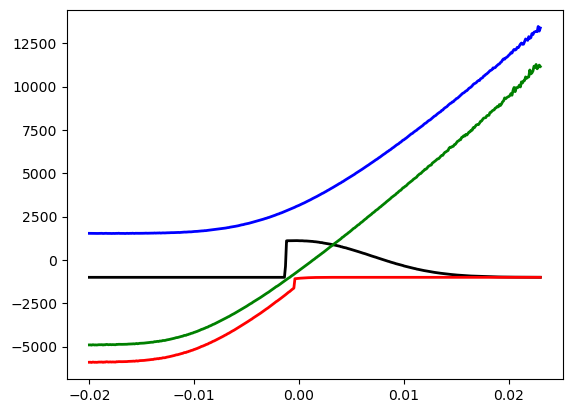

In [18]:
import pandas as pd

# convert the result to a pandas dataframe
result = np.array(result)



df = pd.DataFrame(result, columns=['x', 'y', 'cvar', 'profit', 'cvar_actual'])

# take the average of y values for each x value
averages = df.groupby('x').mean()

# plot the averages
plt.plot(averages.index, averages['y'], color='black', linewidth=2)
plt.plot(averages.index, averages['cvar'], color='red', linewidth=2)
plt.plot(averages.index, averages['profit'], color='blue', linewidth=2)
plt.plot(averages.index, averages['cvar_actual'], color='green', linewidth=2)


In [19]:
# find the x value that maximizes y
max_y = averages['y'].max()
max_x = averages[averages['y'] == max_y].index[0]

print('Maximum expected utility is', max_y, 'when buy threshold is', max_x)


Maximum expected utility is 1118.2263325315957 when buy threshold is -0.00030000000000006616


In [20]:
# find the CVaR when expected utility is maximized
cvar_at_max_y = averages[averages['y'] == max_y]['cvar'].values[0]
print('CVaR at maximum expected utility is', cvar_at_max_y)

CVaR at maximum expected utility is -1073.7440490732001


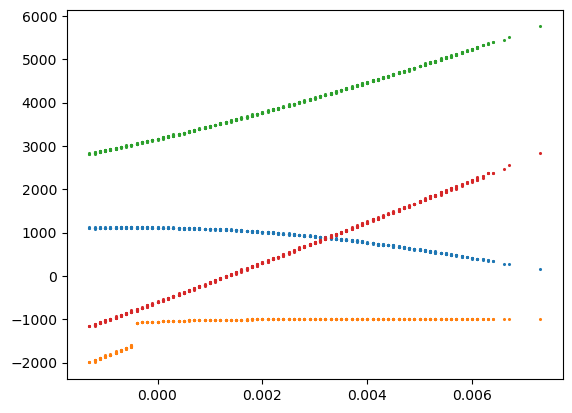

In [21]:
# plot when cvar is >-2000 and < -1000

df_filtered = df[(df['cvar'] > -2000) & (df['cvar'] < -1000)]

plt.scatter(df_filtered['x'], df_filtered['y'], s=1.5)
plt.scatter(df_filtered['x'], df_filtered['cvar'], s=1.5)
plt.scatter(df_filtered['x'], df_filtered['profit'], s=1.5)
plt.scatter(df_filtered['x'], df_filtered['cvar_actual'], s=1.5)


In [22]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

In [45]:
rsi_observed = 58.68
ma50_observed = np.log(0.3772)
expert_subj_opinion_observed = 0.005

In [46]:
model = pm.Model()

ma50_mu = lambda price_1: price_1**2 * -0.26440215 + price_1 * 0.00093349 + 0.00223102
ma50_sigma = lambda price_1: price_1**2 * -0.03285663 + price_1 * -0.00210371 + 0.0045002

rsi_mu = lambda price_1: price_1**2 * -507.22185239 + price_1 * 3.91384377 + 55.87459884
rsi_sigma = lambda price_1: price_1**2 * -156.09564645 + price_1 * -2.90971536 + 9.42581689

with model:
  # Define day 0 variables
  price_0 = pm.Normal("Price 0", mu=0.0025, sigma=0.00327, observed=-0.00594693641)

  # Define day 1 variables
  price_1 = pm.Normal("Price 1", mu=price_0, sigma=0.00327)
  rsi_1 = pm.Normal("RSI", mu=rsi_mu(price_1), sigma=rsi_sigma(price_1))#, observed=rsi_observed) # Given an observation N, enter "observed=N" as a parameter
  ma50_1 = pm.Normal("MA50", mu=ma50_mu(price_1), sigma=ma50_sigma(price_1), observed=ma50_observed) # Given an observation N, enter "observed=N" as a parameter

  # Define day 2 variables
  price_2 = pm.Normal("Price 2", mu=price_1, sigma=0.00327)
  expert_subj_opinion_2 = pm.Normal("Expert Opinion", mu=price_2, sigma=0.00327/4, observed=expert_subj_opinion_observed) # Given an observation N, enter "observed=N" as a parameter

  # Define day 3 variables
  price_3 = pm.Normal("Price 3", mu=price_2, sigma=0.00327)

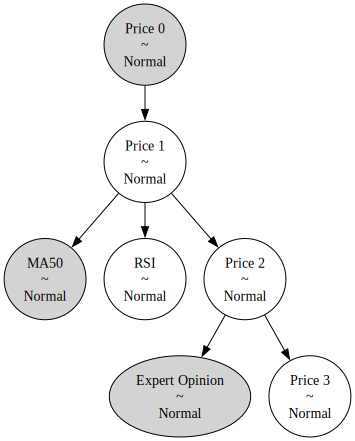

In [47]:
pm.model_to_graphviz(model)

In [48]:
with model:
  trace = pm.sample(draws=20000, tune=1000, chains=4, random_seed=0, cores=16)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 16 jobs)
NUTS: [Price 1, RSI, Price 2, Price 3]


Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 36 seconds.


(20000,)


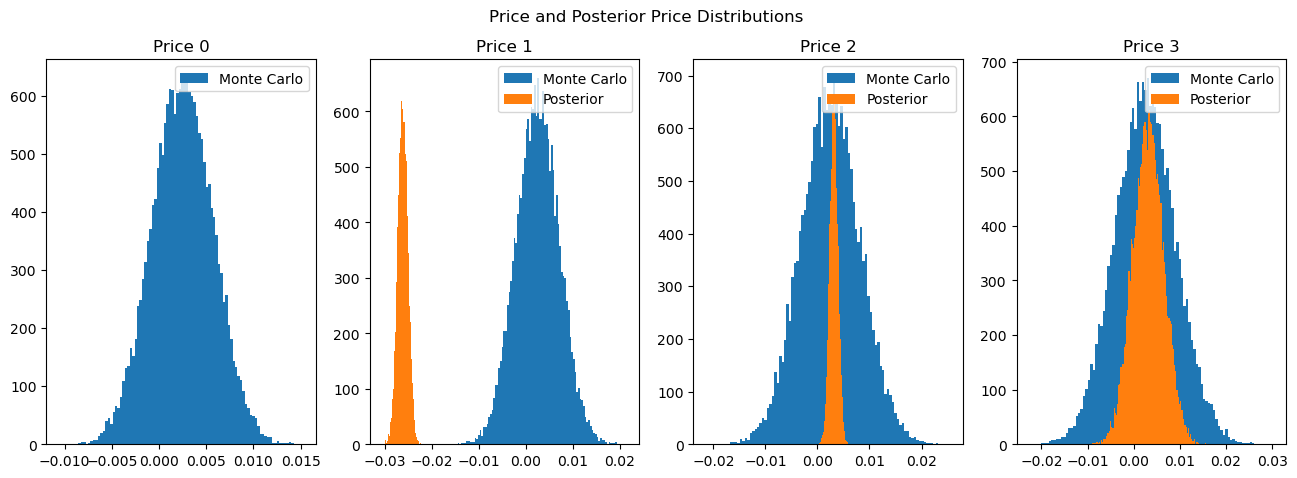

In [67]:
price_0 = np.random.normal(0.0025, 0.00327, 20000)
price_1 = np.random.normal(price_0, 0.00327, 20000)
price_2 = np.random.normal(price_1, 0.00327, 20000)
price_3 = np.random.normal(price_2, 0.00327, 20000)


price_1_p = trace['posterior']['Price 1'][0,:]
price_2_p = trace['posterior']['Price 2'][0,:]
price_3_p = trace['posterior']['Price 3'][0,:]

price_0_p = np.ones(price_1.shape[0]) * -0.00594693641

print(price_2_p.shape)

# plot the distributions of price_0, price_1, price_2, price_3 in subplots
plt.figure(figsize=(10, 10))
plt.subplot(1, 4, 1)
plt.hist(price_0, bins=100)
# show the posterior distribution of price_0
# plt.hist(price_0_p, bins=100)
plt.title('Price 0')
plt.legend(['Monte Carlo', 'Posterior'], loc='upper right')
plt.subplot(1, 4, 2)
plt.hist(price_1, bins=100)
# show the posterior distribution of price_1
plt.hist(price_1_p, bins=100)
plt.title('Price 1')
plt.legend(['Monte Carlo', 'Posterior'], loc='upper right')
plt.subplot(1, 4, 3)
plt.hist(price_2, bins=100)
# show the posterior distribution of price_2
plt.hist(price_2_p, bins=100)
plt.title('Price 2')
plt.legend(['Monte Carlo', 'Posterior'], loc='upper right')
plt.subplot(1, 4, 4)
plt.hist(price_3, bins=100)
# show the posterior distribution of price_3
plt.hist(price_3_p, bins=100)
plt.title('Price 3')

# add global title
plt.suptitle('Price and Posterior Price Distributions')

# add global legand to the top right
plt.legend(['Monte Carlo', 'Posterior'], loc='upper right')

# make the figure 16:9 aspect ratio
plt.gcf().set_size_inches(16, 5)


In [68]:
# Use monte carlo to simulate the expected utility of buy with expert

# price_0 = np.random.normal(0.0025, 0.00327, 100000)
# price_1 = np.random.normal(price_0, 0.00327, 100000)
# price_2 = np.random.normal(price_1, 0.00327, 100000)
# price_3 = np.random.normal(price_2, 0.00327, 100000)


price_1 = trace['posterior']['Price 1'][0,:]
price_2 = trace['posterior']['Price 2'][0,:]
price_3 = trace['posterior']['Price 3'][0,:]

price_0 = np.ones(price_1.shape[0]) * -0.00594693641

price_estimate = np.ones(price_0.shape[0]) * 0.005

price_ratios = np.exp(price_1) * np.exp(price_2) * np.exp(price_3)
potential_profit = price_ratios - 1  # (final_price/initial_price - 1)
potential_profit = potential_profit * share_num  # Scale up to the number of shares

profit = np.where(price_estimate > -0.0007, potential_profit, 0)

# the actual investment profit is the array of actually realized investment profits
# so everytime price estimate is too much and we decidee not to go with the investment
# the return should be ignored
# so only accounting for the times when we actually invest
# Create mask of where we actually invest based on price estimate
investment_mask = price_estimate > -0.0007

# Only include profits where we actually invested
actual_investment_profit = potential_profit[investment_mask]

actual_profit = profit - 1000  # Cost of hiring the expert


# Calculate CVaR (cvar) as the mean of the worst 5% of outcomes from the actual profit
percentile_5 = np.percentile(actual_profit, 5)
tail_values = actual_profit[actual_profit <= percentile_5]
cvar = np.mean(tail_values)  

# Calculate CVaR fron the actual investment profit
percentile_5 = np.percentile(actual_investment_profit, 5)
tail_values = actual_investment_profit[actual_investment_profit <= percentile_5]
cvar_investment = np.mean(tail_values)

print("cvar_investment", cvar_investment)
print("cvar", cvar)

cvar_investment <xarray.DataArray ()>
array(-5470.22829261)
Coordinates:
    chain    int32 0
cvar -6470.228292614583


(array([  2.,   0.,   3.,   4.,   1.,   2.,   5.,  10.,   7.,   5.,   6.,
         12.,  13.,  27.,  35.,  35.,  37.,  26.,  60.,  61.,  73., 109.,
         84., 123., 147., 147., 170., 217., 197., 229., 255., 311., 331.,
        372., 411., 405., 425., 433., 495., 518., 548., 562., 564., 593.,
        575., 600., 568., 609., 577., 627., 545., 597., 566., 574., 523.,
        485., 455., 468., 447., 374., 367., 361., 320., 301., 258., 222.,
        208., 174., 132., 165., 138.,  98.,  80.,  92.,  88.,  43.,  60.,
         57.,  33.,  25.,  23.,  21.,  23.,  10.,  12.,   7.,   2.,   6.,
          3.,   3.,   4.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          2.]),
 array([-7644.98216   , -7587.67841939, -7530.37467878, -7473.07093816,
        -7415.76719755, -7358.46345694, -7301.15971633, -7243.85597571,
        -7186.5522351 , -7129.24849449, -7071.94475387, -7014.64101326,
        -6957.33727265, -6900.03353204, -6842.72979142, -6785.42605081,
        -6728.1223102 , -6670.

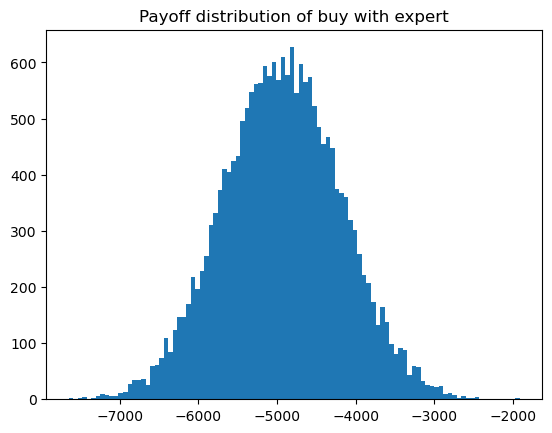

In [61]:
# plot the actual profit distribution
plt.title('Payoff distribution of buy with expert')
plt.hist(actual_profit, bins=100)

(array([  2.,   0.,   3.,   4.,   1.,   2.,   5.,  10.,   7.,   5.,   6.,
         12.,  13.,  27.,  35.,  35.,  37.,  26.,  60.,  61.,  73., 109.,
         84., 123., 147., 147., 170., 217., 197., 229., 255., 311., 331.,
        372., 411., 405., 425., 433., 495., 518., 548., 562., 564., 593.,
        575., 600., 568., 609., 577., 627., 545., 597., 566., 574., 523.,
        485., 455., 468., 447., 374., 367., 361., 320., 301., 258., 222.,
        208., 174., 132., 165., 138.,  98.,  80.,  92.,  88.,  43.,  60.,
         57.,  33.,  25.,  23.,  21.,  23.,  10.,  12.,   7.,   2.,   6.,
          3.,   3.,   4.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          2.]),
 array([-6644.98216   , -6587.67841939, -6530.37467878, -6473.07093816,
        -6415.76719755, -6358.46345694, -6301.15971633, -6243.85597571,
        -6186.5522351 , -6129.24849449, -6071.94475387, -6014.64101326,
        -5957.33727265, -5900.03353204, -5842.72979142, -5785.42605081,
        -5728.1223102 , -5670.

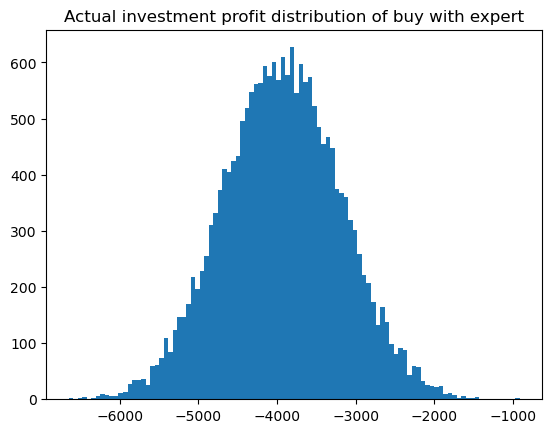

In [ ]:
# plot the distributions actual_investment_profit
plt.title('Actual investment profit distribution of buy with expert')
plt.hist(actual_investment_profit, bins=100)

(array([  2.,   0.,   3.,   4.,   1.,   2.,   5.,  10.,   7.,   5.,   6.,
         12.,  13.,  27.,  35.,  35.,  37.,  26.,  60.,  61.,  73., 109.,
         84., 123., 147., 147., 170., 217., 197., 229., 255., 311., 331.,
        372., 411., 405., 425., 433., 495., 518., 548., 562., 564., 593.,
        575., 600., 568., 609., 577., 627., 545., 597., 566., 574., 523.,
        485., 455., 468., 447., 374., 367., 361., 320., 301., 258., 222.,
        208., 174., 132., 165., 138.,  98.,  80.,  92.,  88.,  43.,  60.,
         57.,  33.,  25.,  23.,  21.,  23.,  10.,  12.,   7.,   2.,   6.,
          3.,   3.,   4.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          2.]),
 array([-6644.98216   , -6587.67841939, -6530.37467878, -6473.07093816,
        -6415.76719755, -6358.46345694, -6301.15971633, -6243.85597571,
        -6186.5522351 , -6129.24849449, -6071.94475387, -6014.64101326,
        -5957.33727265, -5900.03353204, -5842.72979142, -5785.42605081,
        -5728.1223102 , -5670.

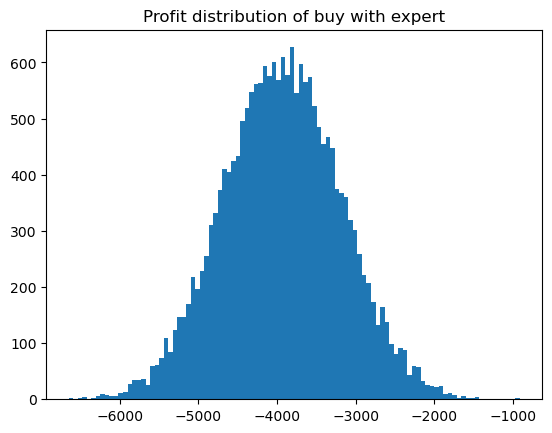

In [63]:
# plot the profit distribution
plt.title('Profit distribution of buy with expert')
plt.hist(profit, bins=100)